In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing train.csv and test.csv
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Description of the data

* survival <=	Survival
        0 = No, 1 = Yes
* pclass <=	Ticket class
        1 = 1st, 2 = 2nd, 3 = 3rd
* sex <=	Sex 	
* Age <=	Age in years 	
* sibsp <=	number of siblings and spouses aboard the Titanic 	
* parch <=	number of parents or childrens aboard the Titanic 	
* ticket <=	Ticket number 	
* fare <=	Passenger fare 	
* cabin <=	Cabin number 	
* embarked <= Port of Embarkation
        C = Cherbourg, Q = Queenstown, S = Southampton

In [3]:
train.set_index('PassengerId', inplace = True)
test.set_index('PassengerId', inplace = True)

In [4]:
train.describe(include = 'all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Masselmani, Mrs. Fatima",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
train.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
208,1,3,"Albimona, Mr. Nassef Cassem",male,26.00,0,0,2699,18.7875,NaN,C
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S
338,1,1,"Burns, Miss. Elizabeth Margaret",female,41.00,0,0,16966,134.5000,E40,C
463,0,1,"Gee, Mr. Arthur H",male,47.00,0,0,111320,38.5000,E63,S
570,1,3,"Jonsson, Mr. Carl",male,32.00,0,0,350417,7.8542,NaN,S
55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.00,0,1,113509,61.9792,B30,C
470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
763,1,3,"Barah, Mr. Hanna Assi",male,20.00,0,0,2663,7.2292,NaN,C
492,0,3,"Windelov, Mr. Einar",male,21.00,0,0,SOTON/OQ 3101317,7.2500,NaN,S


* <b>Numeric Features - </b> Age, Fair, SibSp(Discrete), parch(Discrete)
* <b>Categorial Features - </b> Sex, Embarked, Pclass
* <b>Target</b> Survived(Discrete)

In [6]:
train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [7]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# Data Visualization

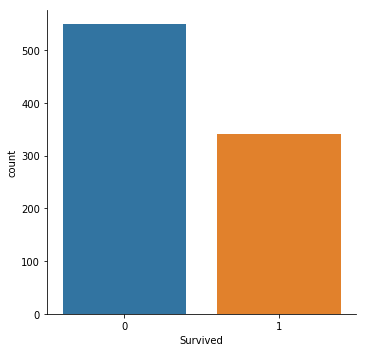

In [8]:
su = sns.catplot('Survived', data = train, kind = 'count', height = 5 )

* survived are less than people not survived

* ## Sex Feature

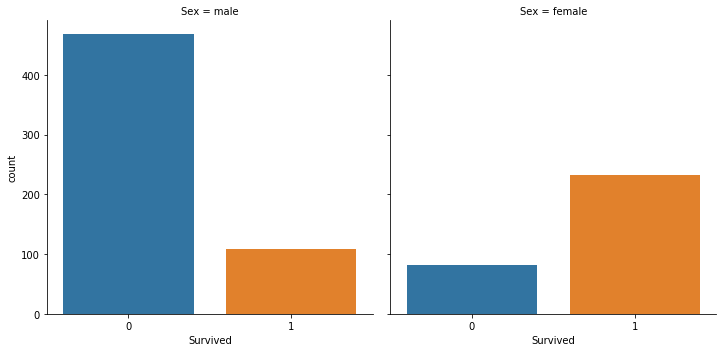

In [9]:
sf = sns.catplot('Survived', col = 'Sex', data = train, kind = 'count')

female has much higher chance of survival than males

* ## Pclass Feature

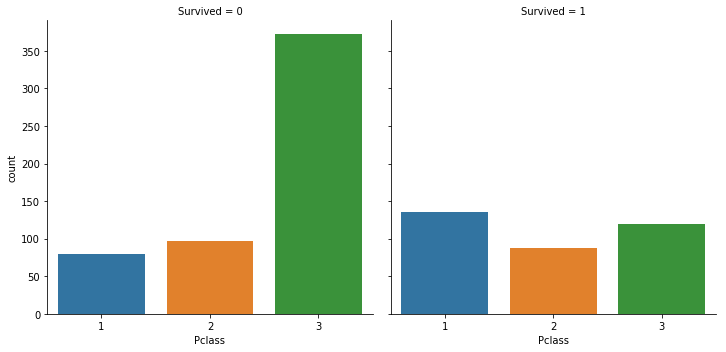

In [10]:
pc = sns.catplot('Pclass', col = 'Survived', data = train, kind = 'count')

In [11]:
print("Fraction of passanger class 1 survived = ", train['Survived'][train["Pclass"] == 1].value_counts(normalize = True)[1])
print("Fraction of passanger class 2 survived = ", train['Survived'][train["Pclass"] == 2].value_counts(normalize = True)[1])
print("Fraction of passanger class 3 survived = ", train['Survived'][train["Pclass"] == 3].value_counts(normalize = True)[1])

Fraction of passanger class 1 survived =  0.6296296296296297
Fraction of passanger class 2 survived =  0.47282608695652173
Fraction of passanger class 3 survived =  0.24236252545824846


People with a higher socioeconomic class had a higher survival rate.

* ## SibSp Feature

In [12]:
train['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [13]:
print("Fraction of passanger with 0 SibSp survived = ", train['Survived'][train["SibSp"] == 0].value_counts(normalize = True)[1])
print("Fraction of passanger with 1 SibSp survived = ", train['Survived'][train["SibSp"] == 1].value_counts(normalize = True)[1])
print("Fraction of passanger with 2 SibSp survived = ", train['Survived'][train["SibSp"] == 2].value_counts(normalize = True)[1])
print("Fraction of passanger with 3 SibSp survived = ", train['Survived'][train["SibSp"] == 3].value_counts(normalize = True)[1])
print("Fraction of passanger with 4 SibSp survived = ", train['Survived'][train["SibSp"] == 4].value_counts(normalize = True)[1])

Fraction of passanger with 0 SibSp survived =  0.34539473684210525
Fraction of passanger with 1 SibSp survived =  0.5358851674641149
Fraction of passanger with 2 SibSp survived =  0.4642857142857143
Fraction of passanger with 3 SibSp survived =  0.25
Fraction of passanger with 4 SibSp survived =  0.16666666666666666


/home/pacific/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


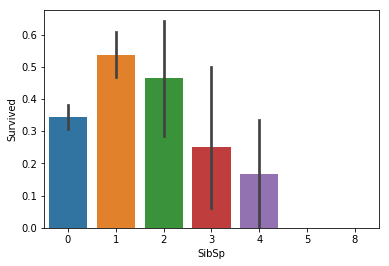

In [14]:
sb = sns.barplot(y = 'Survived' ,x = 'SibSp', data = train)

It can be concluded from the plot that people with more siblings or spouse s are less likely to survive also it is also noticed that passanger on journey alone also has less chances of survival as compared to the one who has one SibSb.

* ## Parch Feature

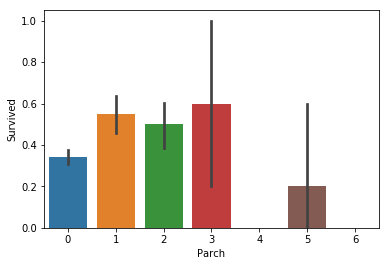

In [15]:
sb = sns.barplot(x = 'Parch', y = 'Survived', data = train)

People with less than four parents or childrens are more likely to survive than those with more. Again, people travelling alone are less likely to survive.

* ## Age Feature

In [16]:
agu = train.Age.unique()
ag0 = pd.Series()
ag1 = pd.Series()
for i in agu:
    ag0 = ag0.append(train['Age'][train['Age'] == i][train['Survived'] == 0].value_counts())
    ag1 = ag1.append(train['Age'][train['Age'] == i][train['Survived'] == 1].value_counts())

In [17]:
ag0 = ag0.to_frame(name = 'Not_Survived')
ag0.reset_index(inplace = True)
ag0 = ag0.rename(index= str, columns = {"index":"Age"})
ag0 = ag0.sort_values(by = ['Age'])

ag1 = ag1.to_frame(name = 'Survived')
ag1.reset_index(inplace = True)
ag1 = ag1.rename(index= str, columns = {"index":"Age"})
ag1 = ag1.sort_values(by = ['Age'])

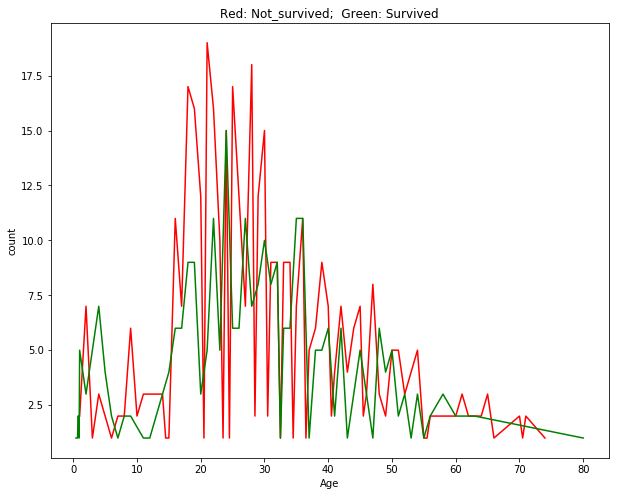

In [18]:
pl = plt.subplots(figsize = (10, 8))
plt.plot(ag0.Age, ag0.Not_Survived, 'r-')
plt.plot(ag1.Age, ag1.Survived, 'g-')
plt.title('Red: Not_survived;  Green: Survived')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

childerns and babies are more likely to survive than any other age group

* ## Cabin Feature

In [19]:
print('entries null in cabin - ', train['Cabin'].isnull().sum())
print('entries not null in cabin - ', train['Cabin'].notnull().sum())

entries null in cabin -  687
entries not null in cabin -  204


there are a large number of null cabin entries

the people mostly with higher socioeconomic status might have their cabin recorded <= let's check this idea

In [20]:
print('Fraction of survived who has record for cabin', train['Survived'][train['Cabin'].notnull() == True].value_counts(normalize = True)[1])
print('Fraction of not survived who has record for cabin', train['Survived'][train['Cabin'].notnull() == True].value_counts(normalize = True)[0])

Fraction of survived who has record for cabin 0.6666666666666666
Fraction of not survived who has record for cabin 0.3333333333333333


In [21]:
print('Fraction of survived who has not record for cabin', train['Survived'][train['Cabin'].isnull() == True].value_counts(normalize = True)[1])
print('Fraction of not survived who has not record for cabin', train['Survived'][train['Cabin'].isnull() == True].value_counts(normalize = True)[0])

Fraction of survived who has not record for cabin 0.29985443959243085
Fraction of not survived who has not record for cabin 0.7001455604075691


* so the passanger who has entry in Cabin is more likely to syrvive

<br><br><br><br><br><br>
# Cleaning Data

<h5>Cleaning train and test data for missing and unnecessary information</h5>

* ## Cabin Feature
    * making a new column named 'cb_not_null' representing information about the not null entry in column 'Cabin'
    * after that dropping Cabin feature

In [22]:
train['cb_not_null'] = train['Cabin'].notnull().astype('int')
test['cb_not_null'] = test['Cabin'].notnull().astype('int')

train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cb_not_null
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


<br><br>
Dropping Cabin feature -- 

In [23]:
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

* ## Ticket Feature 
    * We are dropping Ticket feature for now as it is less likely contain much information about passanger survival.

In [24]:
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

In [25]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,cb_not_null
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0


* ## Sex Feature
    * creating dummy variables for Sex Feature

In [26]:
train = pd.concat([train, pd.get_dummies(train['Sex'], prefix = 'Sex', prefix_sep = '_')], axis = 1, sort = False)
test = pd.concat([test, pd.get_dummies(test['Sex'], prefix = 'Sex', prefix_sep = '_')], axis = 1, sort = False)

In [27]:
train.drop('Sex', axis = 1, inplace = True)
test.drop('Sex', axis = 1, inplace = True)

<br><br>
* ## Embarked Feature

In [28]:
display(train['Embarked'].unique())

array(['S', 'C', 'Q', nan], dtype=object)

In [29]:
display(train.Embarked.isnull().sum())
display(test.Embarked.isnull().sum())

2

0

In [30]:
print("S:  Survived = ", train['Embarked'][train.Survived == 1][train.Embarked == 'S'].count(), " Not-Survived = ", train['Embarked'][train.Survived == 0][train.Embarked == 'S'].count())
print("C:  Survived = ", train['Embarked'][train.Survived == 1][train.Embarked == 'C'].count(), " Not-Survived = ", train['Embarked'][train.Survived == 0][train.Embarked == 'C'].count())
print("Q:  Survived = ", train['Embarked'][train.Survived == 1][train.Embarked == 'Q'].count(), " Not-Survived = ", train['Embarked'][train.Survived == 0][train.Embarked == 'Q'].count())

S:  Survived =  217  Not-Survived =  427
C:  Survived =  93  Not-Survived =  75
Q:  Survived =  30  Not-Survived =  47


Getting dummy features for Embarked feature

In [31]:
train = pd.concat([train, pd.get_dummies(train['Embarked'], prefix = 'Embarked', prefix_sep = '_')], sort = 'False', axis = 1)
test = pd.concat([test, pd.get_dummies(test['Embarked'], prefix = 'Embarked', prefix_sep = '_')], sort = 'False', axis = 1)

In [32]:
train.drop('Embarked', axis = 1, inplace = True)
test.drop('Embarked', axis = 1, inplace = True)

In [33]:
train.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,cb_not_null,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,0,0,1,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,1,1,0,1,0,0
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,0,1,0,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,1,1,0,0,0,1
5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,0,0,1,0,0,1


* ## Age Feature
        * Filling null values in age with mode value

In [34]:
train.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,cb_not_null,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,0,0,1,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,1,1,0,1,0,0
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,0,1,0,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,1,1,0,0,0,1
5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,0,0,1,0,0,1


In [35]:
train.replace({'Age':np.nan},  train['Age'].mode()[0], inplace = True)
test.replace({'Age':np.nan},  test['Age'].mode()[0], inplace = True)

In [36]:
display(train.isnull().sum())
display(test.isnull().sum())

Survived       0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Fare           0
cb_not_null    0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Fare           1
cb_not_null    0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

* ## Fare feature

Separating fare into logical groups after replacing one null value in test.Fare with mode

In [37]:
test.Fare = test.Fare.fillna(train.Fare.mode()[0])
test.Fare.isnull().sum()

0

In [38]:
train['Fare_g'] = pd.qcut(train['Fare'], 3, labels= [-1, 0, 1])
test['Fare_g'] = pd.qcut(test['Fare'], 3, labels= [-1, 0, 1])

In [39]:
# removing Fare column from train and test
del train['Fare']
del test['Fare']

In [40]:
display(train.head())
display(test.head())

,Survived,Pclass,Name,Age,SibSp,Parch,cb_not_null,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Fare_g
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,0,0,1,0,0,1,-1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,1,1,0,1,0,0,1
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,0,1,0,0,0,1,-1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,1,1,0,0,0,1,1
5,0,3,"Allen, Mr. William Henry",35.0,0,0,0,0,1,0,0,1,-1


,Pclass,Name,Age,SibSp,Parch,cb_not_null,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Fare_g
PassengerId,,,,,,,,,,,,
892,3,"Kelly, Mr. James",34.5,0,0,0,0,1,0,1,0,-1
893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,0,1,0,0,0,1,-1
894,2,"Myles, Mr. Thomas Francis",62.0,0,0,0,0,1,0,1,0,0
895,3,"Wirz, Mr. Albert",27.0,0,0,0,0,1,0,0,1,-1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,0,1,0,0,0,1,0


In [41]:
train['Fare_g'].dtypes

CategoricalDtype(categories=[-1, 0, 1], ordered=True)

In [42]:
train['Fare_g'] = train['Fare_g'].astype(int)
test['Fare_g'] = test['Fare_g'].astype(int)

* ## Name Feature

Extracting title for Name in train and test dataframe

In [43]:
train['Title'] = train.Name.str.extract('([A-Z a-z]+)\.')
test['Title'] = test.Name.str.extract('([A-Z a-z]+)\.')

In [44]:
display(train.Title.sample(6))
display(test.Title.sample(6))

PassengerId
374      Mr
783      Mr
458     Mrs
738      Mr
451      Mr
443      Mr
Name: Title, dtype: object

PassengerId
1091      Mrs
1182       Mr
1177       Mr
1241     Miss
1032     Miss
1156       Mr
Name: Title, dtype: object

<br><br>
*     Ratio of survived for each Title group --

In [45]:
train[['Title', 'Survived']].groupby(['Title']).mean().sort_values('Survived')

,Survived
Title,
Capt,0.000000
Don,0.000000
Jonkheer,0.000000
Rev,0.000000
Mr,0.156673
Dr,0.428571
Col,0.500000
Major,0.500000
Master,0.575000


In [46]:
display(train.Title.unique())
display(test.Title.unique())

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

array([' Mr', ' Mrs', ' Miss', ' Master', ' Ms', ' Col', ' Rev', ' Dr',
       ' Dona'], dtype=object)

* mapping Title into categorial values

In [47]:
mapping1 = {" Capt": 0, " Don":0, " Jonkheer":0, " Rev":0, " Mr":1, " Dr":2, " Col":3, " Major":3, " Master":4, " Miss":5, " Mrs":6, " Mme":7, " Sir":7, " Ms":7, " Lady":7, " Mlle":7, " the Countess":7 }
train['Title'] = train['Title'].map(mapping1)


mapping2 = {" Dona":0, " Rev":0, " Mr":1, " Dr":2, " Col":3, " Master":4, " Miss":5, " Mrs":6, " Ms":7 }
test['Title'] = test['Title'].map(mapping2)

In [48]:
train.rename(columns = {'Title':'Title_group'}, inplace = True)
test.rename(columns = {'Title':'Title_group'}, inplace = True)

* Deleting Name Column

In [49]:
del train['Name']
del test['Name']

In [50]:
display(train.head())
display(test.head())

,Survived,Pclass,Age,SibSp,Parch,cb_not_null,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Fare_g,Title_group
PassengerId,,,,,,,,,,,,,
1,0,3,22.0,1,0,0,0,1,0,0,1,-1,1
2,1,1,38.0,1,0,1,1,0,1,0,0,1,6
3,1,3,26.0,0,0,0,1,0,0,0,1,-1,5
4,1,1,35.0,1,0,1,1,0,0,0,1,1,6
5,0,3,35.0,0,0,0,0,1,0,0,1,-1,1


,Pclass,Age,SibSp,Parch,cb_not_null,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Fare_g,Title_group
PassengerId,,,,,,,,,,,,
892,3,34.5,0,0,0,0,1,0,1,0,-1,1
893,3,47.0,1,0,0,1,0,0,0,1,-1,6
894,2,62.0,0,0,0,0,1,0,1,0,0,1
895,3,27.0,0,0,0,0,1,0,0,1,-1,1
896,3,22.0,1,1,0,1,0,0,0,1,0,6


In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train[[ "Age", "SibSp", "Parch", "Title_group"]])
train[["Age", "SibSp", "Parch", "Title_group"]] = scaler.transform(train[["Age", "SibSp", "Parch", "Title_group"]])

scaler2 = StandardScaler()
scaler2.fit(test[["Age", "SibSp", "Parch", "Title_group"]])
test[["Age", "SibSp", "Parch", "Title_group"]] = scaler.transform(test[["Age", "SibSp", "Parch",  "Title_group"]])

/home/pacific/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pacific/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/home/pacific/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pacific/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [52]:
train.sample(10)

,Survived,Pclass,Age,SibSp,Parch,cb_not_null,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Fare_g,Title_group
PassengerId,,,,,,,,,,,,,
88,0,3,-0.346188,-0.474545,-0.473674,0,0,1,0,0,1,-1,-0.797294
273,1,2,0.942456,-0.474545,0.767630,0,1,0,0,0,1,0,1.537975
378,0,1,-0.118780,-0.474545,2.008933,1,0,1,1,0,0,1,-0.797294
114,0,3,-0.649398,0.432793,-0.473674,0,1,0,0,0,1,0,1.070922
706,0,2,0.790851,-0.474545,-0.473674,0,0,1,0,0,1,0,-0.797294
406,0,2,0.411838,0.432793,-0.473674,0,0,1,0,0,1,0,-0.797294
863,1,1,1.473074,-0.474545,-0.473674,1,1,0,0,0,1,0,1.537975
525,0,3,-0.346188,-0.474545,-0.473674,0,0,1,1,0,0,-1,-0.797294
838,0,3,-0.346188,-0.474545,-0.473674,0,0,1,0,0,1,-1,-0.797294


<br><br><br><br>
## Looking at corelation matrix

In [53]:
train.corr()

,Survived,Pclass,Age,SibSp,Parch,cb_not_null,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Fare_g,Title_group
Survived,1.000000,-0.338481,-0.052872,-0.035322,0.081629,0.316912,0.543351,-0.543351,0.168240,0.003650,-0.155660,0.305799,0.579014
Pclass,-0.338481,1.000000,-0.356187,0.083081,0.018443,-0.725541,-0.131900,0.131900,-0.243292,0.221009,0.081720,-0.715209,-0.135780
Age,-0.052872,-0.356187,1.000000,-0.232411,-0.155118,0.254473,-0.073377,0.073377,0.025811,-0.071806,0.014373,0.138309,-0.134954
SibSp,-0.035322,0.083081,-0.232411,1.000000,0.414838,-0.040460,0.114631,-0.114631,-0.059528,-0.026354,0.070941,0.348883,0.213793
Parch,0.081629,0.018443,-0.155118,0.414838,1.000000,0.036987,0.245489,-0.245489,-0.011069,-0.081228,0.063036,0.372558,0.327029
cb_not_null,0.316912,-0.725541,0.254473,-0.040460,0.036987,1.000000,0.140391,-0.140391,0.208528,-0.129572,-0.110087,0.532521,0.155647
Sex_female,0.543351,-0.131900,-0.073377,0.114631,0.245489,0.140391,1.000000,-1.000000,0.082853,0.074115,-0.125722,0.233017,0.937048
Sex_male,-0.543351,0.131900,0.073377,-0.114631,-0.245489,-0.140391,-1.000000,1.000000,-0.082853,-0.074115,0.125722,-0.233017,-0.937048
Embarked_C,0.168240,-0.243292,0.025811,-0.059528,-0.011069,0.208528,0.082853,-0.082853,1.000000,-0.148258,-0.778359,0.207389,0.091412
Embarked_Q,0.003650,0.221009,-0.071806,-0.026354,-0.081228,-0.129572,0.074115,-0.074115,-0.148258,1.000000,-0.496624,-0.222783,0.051407


<br><br><br><br><br><br>
* ### from matrix above we can conclude that 
    * Feature Age, SibSp, Embarked_Q are having very low corelation with target variable so we will not be using them in our model.

<br><br><br><br>
# Choosing the Model

In [54]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer

scorer = make_scorer(accuracy_score)

predictors = np.asanyarray(train[['Pclass', 'cb_not_null', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_S', 'Fare_g', 'Title_group']])
target = np.asanyarray(train['Survived'])



## Testing Different Models

* ## Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression


logistic_reg = LogisticRegression(solver = 'liblinear')
score_log_reg = cross_validate(logistic_reg, predictors, target, cv = 5, scoring = scorer, n_jobs = -1)
print("accuracy = ", score_log_reg['test_score'].mean())

accuracy =  0.8159352107091777


* ## Support Vector Machines

In [56]:
from sklearn.svm import SVC

sv_clf = SVC(gamma = 'auto')
score_svm = cross_validate(sv_clf, predictors, target, cv = 5, scoring = scorer, n_jobs = -1)
print("accuracy = ", score_svm['test_score'].mean())

accuracy =  0.8249431606004283


* ## Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=2 )

score_dt = cross_validate(dt_clf, predictors, target, cv = 5, scoring = scorer, n_jobs = -1)
print("accuracy = ", score_dt['test_score'].mean())

accuracy =  0.8137322428963607


* ## Random Forest Regressor

In [58]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators = 40)

score_rf = cross_validate(rf_clf, predictors, target, cv = 5, scoring = scorer, n_jobs = -1)
print("accuracy = ", score_rf['test_score'].mean())

accuracy =  0.8171157254076282


* ## KNeighbours Classifier

In [59]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

score_knn = cross_validate(knn, predictors, target, cv = 5, scoring = scorer, n_jobs = -1)
print("accuracy = ", score_knn['test_score'].mean())

accuracy =  0.8204740996394408


* ## Gradient Boosting Classifier

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()

score_gb = cross_validate(gb_clf, predictors, target, cv = 5, scoring = scorer, n_jobs = -1)
print("accuracy = ", score_gb['test_score'].mean())

accuracy =  0.820499207918896


<br><br><br><br>
* ### Comparing accuracies of models

In [61]:
models = pd.DataFrame({'Model':['logistic regression', 'SVM', 'Decision Tree', 'Random Forest', 'KNN', 'Gradient Boosting Classifier'], 'Score':[score_log_reg['test_score'].mean(), score_svm['test_score'].mean(), score_dt['test_score'].mean(), score_rf['test_score'].mean(), score_knn['test_score'].mean(), score_gb['test_score'].mean()] })
models.sort_values('Score', ascending = False)

,Model,Score
1,SVM,0.824943
5,Gradient Boosting Classifier,0.820499
4,KNN,0.820474
3,Random Forest,0.817116
0,logistic regression,0.815935
2,Decision Tree,0.813732


### Support vector machine classifier has highest score so we will be using that classifier for our model

<br>

In [62]:
clf = SVC(gamma = 'auto')
clf.fit(predictors, target)
test_predicted = clf.predict(test[['Pclass', 'cb_not_null', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_S', 'Fare_g', 'Title_group']])

In [63]:
test_predicted

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [64]:
prediction = pd.DataFrame()
prediction['PassengerId'] = test.reset_index().PassengerId
prediction['Survived'] = test_predicted
prediction = prediction.set_index('PassengerId')

In [65]:
prediction.to_csv('prediction.csv')